In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
player_df = pd.read_csv('../data/new/players_all.csv')
player_df = player_df.rename(columns={'Unnamed: 0':'Id'})
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        4756 non-null   int64 
 1   No.       4756 non-null   int64 
 2   year      4756 non-null   int64 
 3   Name      4756 non-null   object
 4   Age       4756 non-null   int64 
 5   Team      4756 non-null   object
 6   Position  4756 non-null   object
dtypes: int64(4), object(3)
memory usage: 260.2+ KB


In [313]:
v = player_df.groupby('year')['Name'].value_counts()
v[v>1]

Series([], Name: Name, dtype: int64)

In [314]:
player_df.groupby('year')['Name'].count()

year
2014    531
2015    550
2016    524
2017    515
2018    505
2019    515
2020    524
2021    538
2022    554
Name: Name, dtype: int64

In [315]:
stats1_df = pd.read_csv('../data/new/1xbet_all.csv')
stats1_df = stats1_df.drop(['Team','Age','Position'], axis=1)
stats1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      4756 non-null   object 
 1   Apps      4756 non-null   int64  
 2   Mins      4756 non-null   int64  
 3   Goals     4756 non-null   int64  
 4   Assists   4756 non-null   int64  
 5   SpG       4756 non-null   float64
 6   KeyP      4756 non-null   float64
 7   Drb_x     4756 non-null   float64
 8   Fouled    4756 non-null   float64
 9   Off       4756 non-null   float64
 10  Disp      4756 non-null   float64
 11  UnsTch    4756 non-null   float64
 12  Rating    4756 non-null   float64
 13  Tackles   4756 non-null   float64
 14  Inter     4756 non-null   float64
 15  Fouls     4756 non-null   float64
 16  Offsides  4756 non-null   float64
 17  Clear     4756 non-null   float64
 18  Drb_y     4756 non-null   float64
 19  Blocks    4756 non-null   float64
 20  AvgP      4756 non-null   floa

In [316]:
stats2_df = pd.read_csv('../data/new/understat_all.csv')
stats2_df = stats2_df.drop(['No','Team'], axis=1)
stats2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4755 entries, 0 to 4754
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         4755 non-null   object 
 1   Apps         4755 non-null   int64  
 2   Min          4755 non-null   int64  
 3   G            4755 non-null   int64  
 4   NPG          4755 non-null   int64  
 5   A            4755 non-null   int64  
 6   xG           4755 non-null   float64
 7   NPxG         4755 non-null   float64
 8   xA           4755 non-null   float64
 9   xGChain      4755 non-null   float64
 10  xGBuildup    4755 non-null   float64
 11  xG90         4755 non-null   float64
 12  NPxG90       4755 non-null   float64
 13  xA90         4755 non-null   float64
 14  xG90+xA90    4755 non-null   float64
 15  NPxG90+xA90  4755 non-null   float64
 16  xGChain90    4755 non-null   float64
 17  xGBuildup90  4755 non-null   float64
 18  year         4755 non-null   int64  
dtypes: flo

In [317]:
salary_df = pd.read_csv('../data/new/salary_all.csv')
salary_df = salary_df.drop(['Position', 'Team'], axis=1)
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           4803 non-null   float64
 1   Name           4803 non-null   object 
 2   Weekly Salary  4803 non-null   int64  
 3   year           4803 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 150.2+ KB


In [318]:
salary2_df = pd.read_csv('../data/new/capology_all.csv')
salary2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6140 entries, 0 to 6139
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           6140 non-null   object
 1   Weekly Salary  6140 non-null   int64 
 2   Base Salary    6140 non-null   int64 
 3   ADJ Salary     6140 non-null   int64 
 4   Team           6140 non-null   object
 5   year           6140 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 287.9+ KB


In [319]:
# player_df, salary_df, stats1_df, stats2_df
eda_df = player_df.merge(salary2_df[['Weekly Salary','Base Salary','ADJ Salary','Name', 'year']], how='left', left_on=['Name', 'year'], right_on=['Name', 'year'])
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4904 entries, 0 to 4903
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4904 non-null   int64  
 1   No.            4904 non-null   int64  
 2   year           4904 non-null   int64  
 3   Name           4904 non-null   object 
 4   Age            4904 non-null   int64  
 5   Team           4904 non-null   object 
 6   Position       4904 non-null   object 
 7   Weekly Salary  4746 non-null   float64
 8   Base Salary    4746 non-null   float64
 9   ADJ Salary     4746 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 421.4+ KB


In [320]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756 entries, 0 to 4755
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        4756 non-null   int64 
 1   No.       4756 non-null   int64 
 2   year      4756 non-null   int64 
 3   Name      4756 non-null   object
 4   Age       4756 non-null   int64 
 5   Team      4756 non-null   object
 6   Position  4756 non-null   object
dtypes: int64(4), object(3)
memory usage: 260.2+ KB


In [321]:
eda_df = eda_df[~eda_df.duplicated(['year', 'Name'], keep='first')]
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 0 to 4903
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4756 non-null   int64  
 1   No.            4756 non-null   int64  
 2   year           4756 non-null   int64  
 3   Name           4756 non-null   object 
 4   Age            4756 non-null   int64  
 5   Team           4756 non-null   object 
 6   Position       4756 non-null   object 
 7   Weekly Salary  4598 non-null   float64
 8   Base Salary    4598 non-null   float64
 9   ADJ Salary     4598 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 408.7+ KB


In [322]:
eda_df.isnull().sum(axis=0)

Id                 0
No.                0
year               0
Name               0
Age                0
Team               0
Position           0
Weekly Salary    158
Base Salary      158
ADJ Salary       158
dtype: int64

In [323]:
eda_df.isnull().mean()

Id               0.000000
No.              0.000000
year             0.000000
Name             0.000000
Age              0.000000
Team             0.000000
Position         0.000000
Weekly Salary    0.033221
Base Salary      0.033221
ADJ Salary       0.033221
dtype: float64

In [324]:
na_list = eda_df.loc[eda_df.isnull().any(axis=1)].loc[:, ['Name','year', 'Team']]
na_list.to_excel('../data/dummy/na.xlsx')

In [325]:
salary2_df[salary2_df['Name'].apply(lambda n: 'Yun' in n)]

,Name,Weekly Salary,Base Salary,ADJ Salary,Team,year
651,Yun Suk-Young,0,0,0,QPR,2014


In [326]:
na_list.groupby('year')['Name'].count()

year
2014     2
2015     2
2017     2
2018     1
2019    40
2020    33
2021    42
2022    36
Name: Name, dtype: int64

In [327]:
player_df.groupby('year')['Name'].count()

year
2014    531
2015    550
2016    524
2017    515
2018    505
2019    515
2020    524
2021    538
2022    554
Name: Name, dtype: int64

In [328]:
eda_df.groupby('year')['Name'].count()

year
2014    531
2015    550
2016    524
2017    515
2018    505
2019    515
2020    524
2021    538
2022    554
Name: Name, dtype: int64

In [329]:
eda_df[eda_df['Weekly Salary'].isnull()].head()

,Id,No.,year,Name,Age,Team,Position,Weekly Salary,Base Salary,ADJ Salary
449,424,1148,2014,Matthew Jarvis,28,West Ham,Midfielder,NaN,NaN,NaN
552,522,1209,2014,Mohamed Salah,22,Chelsea,Forward,NaN,NaN,NaN
841,805,1685,2015,Wes Hoolahan,33,Norwich,Midfielder,NaN,NaN,NaN
1034,991,1148,2015,Matthew Jarvis,29,Norwich,Midfielder,NaN,NaN,NaN
1686,1605,1354,2017,Philippe Coutinho,25,Liverpool,Midfielder,NaN,NaN,NaN


In [330]:
salary_df.groupby('year')['Name'].count()

year
2014    226
2015    374
2016    577
2017    588
2018    587
2019    648
2020    631
2021    609
2022    563
Name: Name, dtype: int64

In [331]:
eda_df.head()

,Id,No.,year,Name,Age,Team,Position,Weekly Salary,Base Salary,ADJ Salary
0,0,450,2014,Eden Hazard,23,Chelsea,Forward,185827.0,9663000.0,11640054.0
1,1,74,2014,Alexis Sanchez,25,Arsenal,Forward,140000.0,7280000.0,8769491.0
2,2,1508,2014,Sergio Aguero,26,Man City,Forward,160000.0,8320000.0,10022275.0
3,3,261,2014,Cesc Fabregas,27,Chelsea,Midfielder,171481.0,8917000.0,10741422.0
4,4,1480,2014,Santi Cazorla,29,Arsenal,Midfielder,90000.0,4680000.0,5637530.0


In [332]:
stats1_df.head()

,Name,Apps,Mins,Goals,Assists,SpG,KeyP,Drb_x,Fouled,Off,...,Tackles,Inter,Fouls,Offsides,Clear,Drb_y,Blocks,AvgP,PS%,year
0,Eden Hazard,38,3379,14,9,2.052632,2.631579,4.763158,2.973684,0.105263,...,0.736842,0.578947,0.315789,0.0,0.236842,0.605263,0.026316,58.368421,86.834986,2014
1,Alexis Sanchez,35,2953,16,8,3.485714,2.342857,3.285714,2.057143,0.228571,...,1.971429,1.171429,1.257143,0.0,0.171429,1.542857,0.000000,42.000000,76.802721,2014
2,Sergio Aguero,33,2540,26,8,4.484848,1.000000,2.636364,0.757576,1.000000,...,0.666667,0.393939,0.545455,0.0,0.060606,0.515152,0.000000,25.242424,85.594238,2014
3,Cesc Fabregas,34,2890,3,18,1.264706,2.794118,1.058824,1.058824,0.029412,...,2.588235,0.676471,0.882353,0.0,0.882353,2.117647,0.147059,80.647059,85.193290,2014
4,Santi Cazorla,37,2992,7,11,2.513514,2.108108,2.351351,1.648649,0.054054,...,1.594595,1.081081,0.540541,0.0,0.648649,1.459459,0.135135,64.027027,89.024905,2014


In [333]:
# player_df, salary_df, stats1_df, stats2_df
eda_df = eda_df.merge(stats2_df, how='left', left_on=['Name', 'year'], right_on=['Name', 'year'])
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 0 to 4755
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4756 non-null   int64  
 1   No.            4756 non-null   int64  
 2   year           4756 non-null   int64  
 3   Name           4756 non-null   object 
 4   Age            4756 non-null   int64  
 5   Team           4756 non-null   object 
 6   Position       4756 non-null   object 
 7   Weekly Salary  4598 non-null   float64
 8   Base Salary    4598 non-null   float64
 9   ADJ Salary     4598 non-null   float64
 10  Apps           4744 non-null   float64
 11  Min            4744 non-null   float64
 12  G              4744 non-null   float64
 13  NPG            4744 non-null   float64
 14  A              4744 non-null   float64
 15  xG             4744 non-null   float64
 16  NPxG           4744 non-null   float64
 17  xA             4744 non-null   float64
 18  xGChain 

In [334]:
eda_df.columns

Index(['Id', 'No.', 'year', 'Name', 'Age', 'Team', 'Position', 'Weekly Salary',
       'Base Salary', 'ADJ Salary', 'Apps', 'Min', 'G', 'NPG', 'A', 'xG',
       'NPxG', 'xA', 'xGChain', 'xGBuildup', 'xG90', 'NPxG90', 'xA90',
       'xG90+xA90', 'NPxG90+xA90', 'xGChain90', 'xGBuildup90'],
      dtype='object')

In [335]:
stats1_df.head()

,Name,Apps,Mins,Goals,Assists,SpG,KeyP,Drb_x,Fouled,Off,...,Tackles,Inter,Fouls,Offsides,Clear,Drb_y,Blocks,AvgP,PS%,year
0,Eden Hazard,38,3379,14,9,2.052632,2.631579,4.763158,2.973684,0.105263,...,0.736842,0.578947,0.315789,0.0,0.236842,0.605263,0.026316,58.368421,86.834986,2014
1,Alexis Sanchez,35,2953,16,8,3.485714,2.342857,3.285714,2.057143,0.228571,...,1.971429,1.171429,1.257143,0.0,0.171429,1.542857,0.000000,42.000000,76.802721,2014
2,Sergio Aguero,33,2540,26,8,4.484848,1.000000,2.636364,0.757576,1.000000,...,0.666667,0.393939,0.545455,0.0,0.060606,0.515152,0.000000,25.242424,85.594238,2014
3,Cesc Fabregas,34,2890,3,18,1.264706,2.794118,1.058824,1.058824,0.029412,...,2.588235,0.676471,0.882353,0.0,0.882353,2.117647,0.147059,80.647059,85.193290,2014
4,Santi Cazorla,37,2992,7,11,2.513514,2.108108,2.351351,1.648649,0.054054,...,1.594595,1.081081,0.540541,0.0,0.648649,1.459459,0.135135,64.027027,89.024905,2014


In [336]:
eda_df = eda_df.rename(columns={'ADJ.Gross Salary':'ADJ Salary'})
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 0 to 4755
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4756 non-null   int64  
 1   No.            4756 non-null   int64  
 2   year           4756 non-null   int64  
 3   Name           4756 non-null   object 
 4   Age            4756 non-null   int64  
 5   Team           4756 non-null   object 
 6   Position       4756 non-null   object 
 7   Weekly Salary  4598 non-null   float64
 8   Base Salary    4598 non-null   float64
 9   ADJ Salary     4598 non-null   float64
 10  Apps           4744 non-null   float64
 11  Min            4744 non-null   float64
 12  G              4744 non-null   float64
 13  NPG            4744 non-null   float64
 14  A              4744 non-null   float64
 15  xG             4744 non-null   float64
 16  NPxG           4744 non-null   float64
 17  xA             4744 non-null   float64
 18  xGChain 

In [337]:
stats1_df.columns

Index(['Name', 'Apps', 'Mins', 'Goals', 'Assists', 'SpG', 'KeyP', 'Drb_x',
       'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating', 'Tackles', 'Inter',
       'Fouls', 'Offsides', 'Clear', 'Drb_y', 'Blocks', 'AvgP', 'PS%', 'year'],
      dtype='object')

In [338]:
stats2_df.columns

Index(['Name', 'Apps', 'Min', 'G', 'NPG', 'A', 'xG', 'NPxG', 'xA', 'xGChain',
       'xGBuildup', 'xG90', 'NPxG90', 'xA90', 'xG90+xA90', 'NPxG90+xA90',
       'xGChain90', 'xGBuildup90', 'year'],
      dtype='object')

In [339]:
# player_df, salary_df, stats1_df, stats2_df
eda_df = eda_df.merge(stats1_df[['Name', 'SpG', 'KeyP', 'Drb_x',
       'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating', 'Tackles', 'Inter',
       'Fouls', 'Offsides', 'Clear', 'Drb_y', 'Blocks', 'year']], how='left', left_on=['Name', 'year'], right_on=['Name', 'year'])
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 0 to 4755
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4756 non-null   int64  
 1   No.            4756 non-null   int64  
 2   year           4756 non-null   int64  
 3   Name           4756 non-null   object 
 4   Age            4756 non-null   int64  
 5   Team           4756 non-null   object 
 6   Position       4756 non-null   object 
 7   Weekly Salary  4598 non-null   float64
 8   Base Salary    4598 non-null   float64
 9   ADJ Salary     4598 non-null   float64
 10  Apps           4744 non-null   float64
 11  Min            4744 non-null   float64
 12  G              4744 non-null   float64
 13  NPG            4744 non-null   float64
 14  A              4744 non-null   float64
 15  xG             4744 non-null   float64
 16  NPxG           4744 non-null   float64
 17  xA             4744 non-null   float64
 18  xGChain 

In [340]:
eda_df.describe()

,Id,No.,year,Age,Weekly Salary,Base Salary,ADJ Salary,Apps,Min,G,...,Disp,UnsTch,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_y,Blocks
count,4756.00000,4756.000000,4756.000000,4756.000000,4598.000000,4.598000e+03,4.598000e+03,4744.000000,4744.000000,4744.000000,...,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000
mean,2377.50000,854.587258,2018.011775,25.716358,53948.264028,2.805310e+06,3.078878e+06,20.015388,1422.861088,1.905776,...,0.628280,0.861488,6.633622,1.104732,0.760962,0.684579,0.122705,1.492681,0.595462,0.218421
std,1373.08327,505.577918,2.609267,4.334402,52865.812060,2.749022e+06,2.949711e+06,11.749582,1044.307342,3.478281,...,0.598448,0.708093,0.367635,0.848393,0.703191,0.467757,0.228115,1.743603,0.484194,0.293328
min,0.00000,1.000000,2014.000000,15.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,...,0.000000,0.000000,4.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1188.75000,402.000000,2016.000000,23.000000,20000.000000,1.040000e+06,1.252784e+06,10.000000,443.000000,0.000000,...,0.142857,0.307692,6.380000,0.446637,0.166667,0.352941,0.000000,0.307692,0.230769,0.000000
50%,2377.50000,838.000000,2018.000000,26.000000,40000.000000,2.080000e+06,2.301310e+06,21.000000,1335.500000,0.000000,...,0.500000,0.742857,6.635729,1.000000,0.615385,0.666667,0.000000,0.818182,0.520000,0.100000
75%,3566.25000,1296.250000,2020.000000,29.000000,70000.000000,3.640000e+06,4.071549e+06,30.000000,2289.250000,2.000000,...,0.960000,1.258065,6.872418,1.615385,1.178571,1.000000,0.142857,2.045996,0.870968,0.321429
max,4755.00000,1734.000000,2022.000000,41.000000,600000.000000,3.120000e+07,3.367168e+07,38.000000,3420.000000,36.000000,...,4.205882,4.060606,8.340000,7.000000,4.216216,4.000000,2.000000,11.500000,4.000000,2.052632


<Axes: xlabel='ADJ Salary', ylabel='Count'>

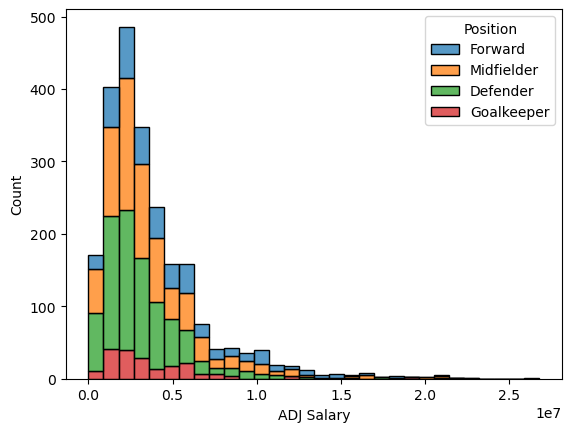

In [341]:
sns.histplot(data=eda_df[eda_df['Min']>1400], x='ADJ Salary', bins=30, hue='Position', multiple='stack')

<Axes: xlabel='ADJ Salary', ylabel='Density'>

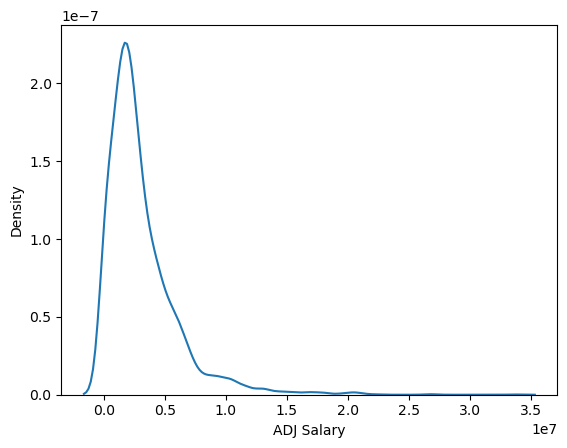

In [342]:
sns.kdeplot(data=eda_df, x='ADJ Salary')#, hue='Position')

In [343]:
# 포지션 별 통계치
round(eda_df.groupby('Position')['ADJ Salary'].describe().T, 1)

Position,Defender,Forward,Goalkeeper,Midfielder
count,1582.0,1041.0,367.0,1608.0
mean,2716259.9,3604559.2,2952470.5,3124163.6
std,2200660.1,3690713.1,2851615.1,3023826.6
min,0.0,0.0,0.0,0.0
25%,1252784.0,1240277.0,1224811.0,1274007.5
50%,2087400.0,2568805.0,2116354.0,2301310.0
75%,3647765.0,4728953.0,3758131.5,4054285.8
max,17680000.0,33671679.0,21574786.0,22447786.0


<Axes: xlabel='Position', ylabel='ADJ Salary'>

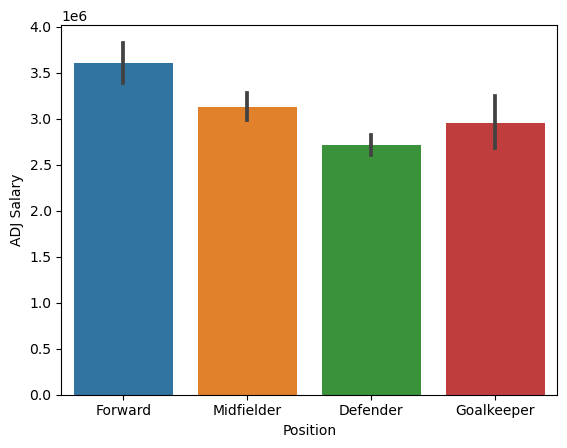

In [344]:
sns.barplot(data=eda_df, x='Position', y='ADJ Salary')

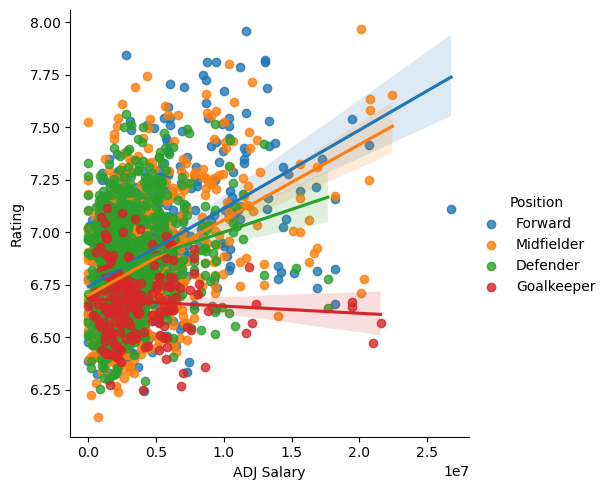

In [345]:
# 연봉과 평점과의 관계
sns.lmplot(data=eda_df[eda_df['Min']>1400], x='ADJ Salary', y='Rating', hue='Position')

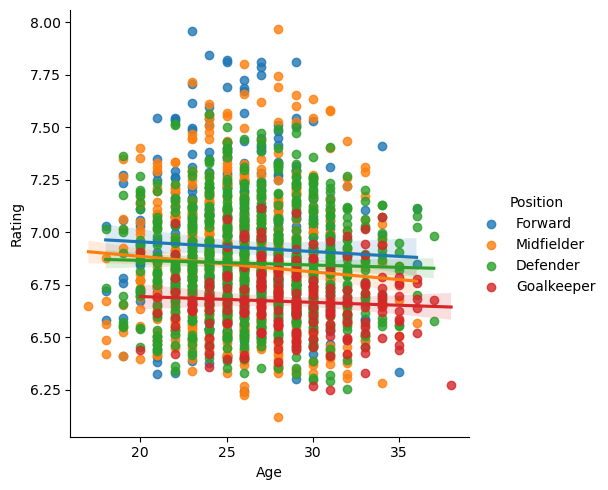

In [346]:
sns.lmplot(data=eda_df[eda_df['Min']>1400], x='Age', y='Rating', hue='Position')

In [347]:
origin_df = eda_df.copy()

In [348]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 0 to 4755
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4756 non-null   int64  
 1   No.            4756 non-null   int64  
 2   year           4756 non-null   int64  
 3   Name           4756 non-null   object 
 4   Age            4756 non-null   int64  
 5   Team           4756 non-null   object 
 6   Position       4756 non-null   object 
 7   Weekly Salary  4598 non-null   float64
 8   Base Salary    4598 non-null   float64
 9   ADJ Salary     4598 non-null   float64
 10  Apps           4744 non-null   float64
 11  Min            4744 non-null   float64
 12  G              4744 non-null   float64
 13  NPG            4744 non-null   float64
 14  A              4744 non-null   float64
 15  xG             4744 non-null   float64
 16  NPxG           4744 non-null   float64
 17  xA             4744 non-null   float64
 18  xGChain 

In [349]:
eda_df = eda_df.dropna()
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4588 entries, 0 to 4754
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4588 non-null   int64  
 1   No.            4588 non-null   int64  
 2   year           4588 non-null   int64  
 3   Name           4588 non-null   object 
 4   Age            4588 non-null   int64  
 5   Team           4588 non-null   object 
 6   Position       4588 non-null   object 
 7   Weekly Salary  4588 non-null   float64
 8   Base Salary    4588 non-null   float64
 9   ADJ Salary     4588 non-null   float64
 10  Apps           4588 non-null   float64
 11  Min            4588 non-null   float64
 12  G              4588 non-null   float64
 13  NPG            4588 non-null   float64
 14  A              4588 non-null   float64
 15  xG             4588 non-null   float64
 16  NPxG           4588 non-null   float64
 17  xA             4588 non-null   float64
 18  xGChain 

In [350]:
eda_df['Position'].value_counts()

Midfielder    1608
Defender      1575
Forward       1039
Goalkeeper     366
Name: Position, dtype: int64

In [351]:
# position factorize
# eda_df.Position = pd.factorize(eda_df.Position)[0]
# eda_df['Position'].value_counts()

In [352]:
eda_df.Team = pd.factorize(eda_df.Team)[0]
eda_df.head()

,Id,No.,year,Name,Age,Team,Position,Weekly Salary,Base Salary,ADJ Salary,...,Disp,UnsTch,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_y,Blocks
0,0,450,2014,Eden Hazard,23,0,Forward,185827.0,9663000.0,11640054.0,...,2.710526,2.105263,7.956842,0.736842,0.578947,0.315789,0.0,0.236842,0.605263,0.026316
1,1,74,2014,Alexis Sanchez,25,1,Forward,140000.0,7280000.0,8769491.0,...,3.314286,2.114286,7.810857,1.971429,1.171429,1.257143,0.0,0.171429,1.542857,0.000000
2,2,1508,2014,Sergio Aguero,26,2,Forward,160000.0,8320000.0,10022275.0,...,2.727273,1.939394,7.671515,0.666667,0.393939,0.545455,0.0,0.060606,0.515152,0.000000
3,3,261,2014,Cesc Fabregas,27,0,Midfielder,171481.0,8917000.0,10741422.0,...,1.411765,1.000000,7.618529,2.588235,0.676471,0.882353,0.0,0.882353,2.117647,0.147059
4,4,1480,2014,Santi Cazorla,29,1,Midfielder,90000.0,4680000.0,5637530.0,...,1.486486,1.000000,7.599459,1.594595,1.081081,0.540541,0.0,0.648649,1.459459,0.135135


In [353]:
eda_df.Team.value_counts()

4     247
3     236
1     233
15    232
5     232
12    228
0     226
8     224
7     223
9     220
11    215
2     209
20    166
22    161
16    160
19    152
24    135
10    128
26    117
6     107
17    105
18     85
28     81
21     77
30     73
25     56
13     51
29     49
31     48
32     33
14     28
23     26
27     25
Name: Team, dtype: int64

In [354]:
eda_df.head()

,Id,No.,year,Name,Age,Team,Position,Weekly Salary,Base Salary,ADJ Salary,...,Disp,UnsTch,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_y,Blocks
0,0,450,2014,Eden Hazard,23,0,Forward,185827.0,9663000.0,11640054.0,...,2.710526,2.105263,7.956842,0.736842,0.578947,0.315789,0.0,0.236842,0.605263,0.026316
1,1,74,2014,Alexis Sanchez,25,1,Forward,140000.0,7280000.0,8769491.0,...,3.314286,2.114286,7.810857,1.971429,1.171429,1.257143,0.0,0.171429,1.542857,0.000000
2,2,1508,2014,Sergio Aguero,26,2,Forward,160000.0,8320000.0,10022275.0,...,2.727273,1.939394,7.671515,0.666667,0.393939,0.545455,0.0,0.060606,0.515152,0.000000
3,3,261,2014,Cesc Fabregas,27,0,Midfielder,171481.0,8917000.0,10741422.0,...,1.411765,1.000000,7.618529,2.588235,0.676471,0.882353,0.0,0.882353,2.117647,0.147059
4,4,1480,2014,Santi Cazorla,29,1,Midfielder,90000.0,4680000.0,5637530.0,...,1.486486,1.000000,7.599459,1.594595,1.081081,0.540541,0.0,0.648649,1.459459,0.135135


In [355]:
eda_df = eda_df.drop(['Id', 'No.', 'year', 'Weekly Salary', 'Base Salary', 'Name', 'Team','xG90', 'NPxG90', 'xA90', 'xG90+xA90', 'NPxG90+xA90', 'xGChain90', 'xGBuildup90', 'Fouled', 'Fouls', 'Off', 'Offsides'], axis=1)

In [356]:
eda_df.xG = eda_df.xG - eda_df.G
eda_df.xA = eda_df.xA - eda_df.A

In [357]:
eda_df['Position'].value_counts()

Midfielder    1608
Defender      1575
Forward       1039
Goalkeeper     366
Name: Position, dtype: int64

In [358]:
mid_df = eda_df[eda_df['Position']=='Midfielder'].drop('Position', axis=1)
def_df = eda_df[eda_df['Position']=='Defender'].drop('Position', axis=1)
for_df = eda_df[eda_df['Position']=='Forward'].drop('Position', axis=1)
keep_df = eda_df[eda_df['Position']=='Goalkeeper'].drop('Position', axis=1)

In [359]:
mid_df.head()

,Age,ADJ Salary,Apps,Min,G,NPG,A,xG,NPxG,xA,...,KeyP,Drb_x,Disp,UnsTch,Rating,Tackles,Inter,Clear,Drb_y,Blocks
3,27,10741422.0,34.0,2895.0,3.0,3.0,18.0,0.25,3.25,-7.85,...,2.794118,1.058824,1.411765,1.000000,7.618529,2.588235,0.676471,0.882353,2.117647,0.147059
4,29,5637530.0,37.0,2999.0,7.0,1.0,11.0,3.59,6.02,-1.24,...,2.108108,2.351351,1.486486,1.000000,7.599459,1.594595,1.081081,0.648649,1.459459,0.135135
5,25,8769491.0,22.0,1861.0,4.0,4.0,5.0,-0.14,3.86,1.66,...,3.136364,2.363636,1.681818,1.454545,7.569545,1.272727,0.454545,0.272727,0.681818,0.045455
6,30,2192373.0,24.0,2092.0,5.0,2.0,3.0,-1.10,1.62,-2.01,...,0.583333,0.125000,0.375000,0.208333,7.545833,3.333333,3.375000,3.500000,1.125000,0.583333
7,28,10022275.0,32.0,2682.0,12.0,12.0,7.0,-2.90,9.10,3.39,...,2.875000,1.593750,2.312500,1.312500,7.526875,1.437500,0.656250,0.250000,1.718750,0.093750


In [360]:
from sklearn.preprocessing import RobustScaler

In [361]:
rob = RobustScaler()
mid_df = pd.DataFrame(rob.fit_transform(mid_df), columns=mid_df.columns)
rob = RobustScaler()
def_df = pd.DataFrame(rob.fit_transform(def_df), columns=def_df.columns)
rob = RobustScaler()
for_df = pd.DataFrame(rob.fit_transform(for_df), columns=for_df.columns)
rob = RobustScaler()
keep_df = pd.DataFrame(rob.fit_transform(keep_df), columns=keep_df.columns)

In [362]:
mid_df.columns

Index(['Age', 'ADJ Salary', 'Apps', 'Min', 'G', 'NPG', 'A', 'xG', 'NPxG', 'xA',
       'xGChain', 'xGBuildup', 'SpG', 'KeyP', 'Drb_x', 'Disp', 'UnsTch',
       'Rating', 'Tackles', 'Inter', 'Clear', 'Drb_y', 'Blocks'],
      dtype='object')

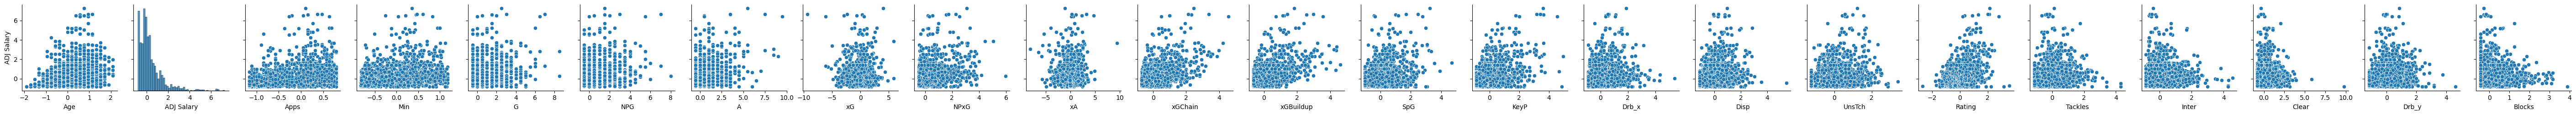

In [363]:
sns.pairplot(mid_df, x_vars=mid_df.columns, y_vars=['ADJ Salary'])

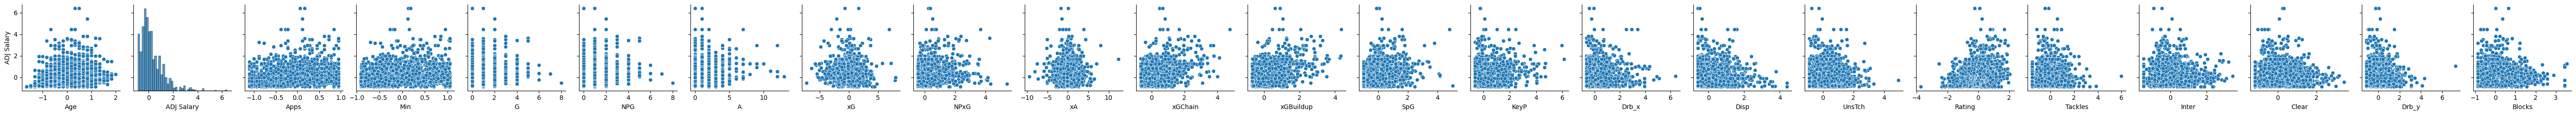

In [364]:
sns.pairplot(def_df, x_vars=def_df.columns, y_vars=['ADJ Salary'])

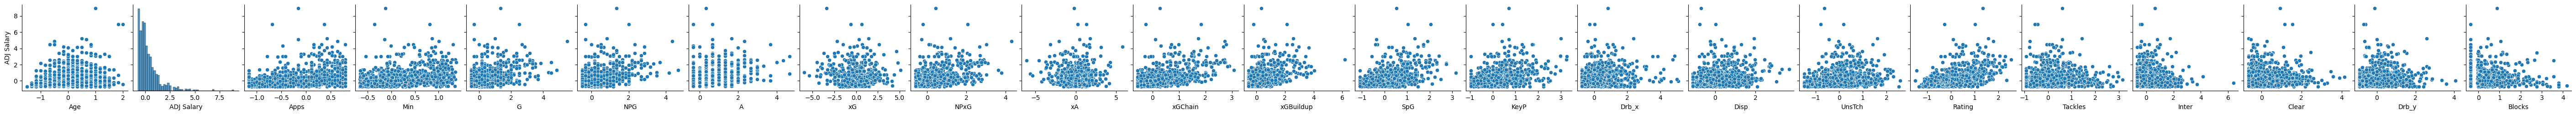

In [365]:
sns.pairplot(for_df, x_vars=for_df.columns, y_vars=['ADJ Salary'])

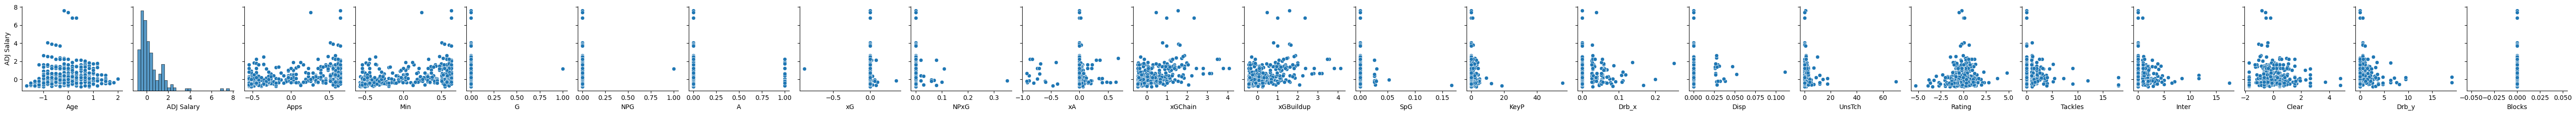

In [366]:
sns.pairplot(keep_df, x_vars=keep_df.columns, y_vars=['ADJ Salary'])

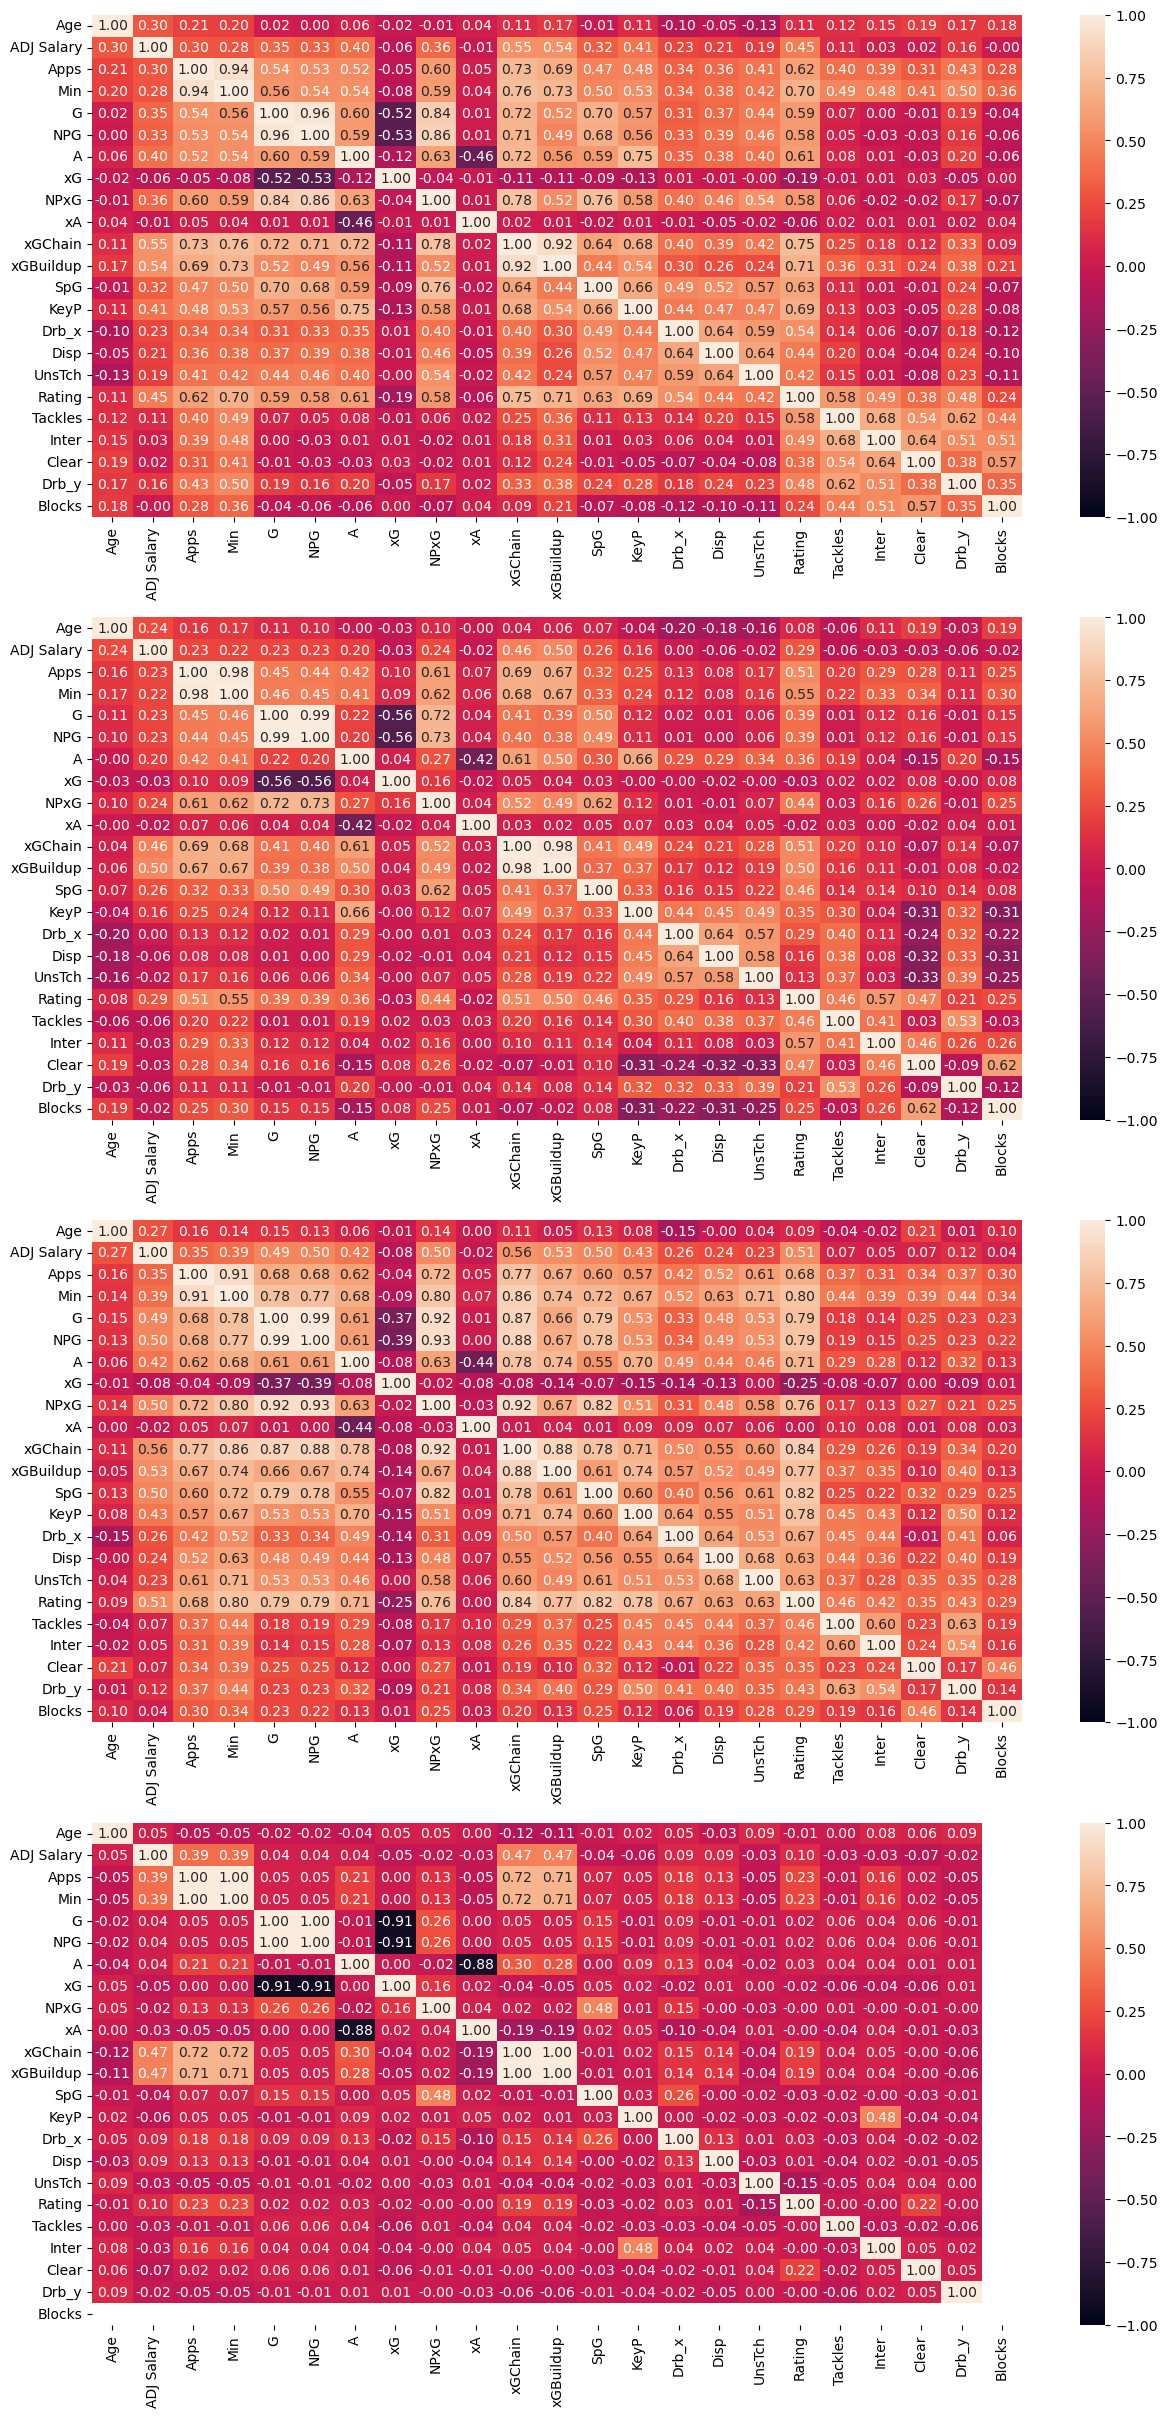

In [367]:
plt.figure(figsize=(15,30))
plt.subplot(4,1,1)
sns.heatmap(data=mid_df.corr(numeric_only=True), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.subplot(4,1,2)
sns.heatmap(data=def_df.corr(numeric_only=True), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.subplot(4,1,3)
sns.heatmap(data=for_df.corr(numeric_only=True), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.subplot(4,1,4)
sns.heatmap(data=keep_df.corr(numeric_only=True), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()